<a href="https://colab.research.google.com/github/rafaeldjsm/Datacamp_Projects/blob/main/StarbucksLocations_datacamp_kde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture cptest
!pip install geopandas

In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd # '0.11.1'
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_denver = pd.read_csv("/content/denver.csv")
df_denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [4]:
df_denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
df_dup = df_denver[df_denver.duplicated(subset=['Longitude','Latitude'],keep = False)]
df_dup

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
5,75003-33060,King Soopers-Denver #29,303-832-5262,1155 E. 9th Ave.,NaN,Capitol Hill Center,802184802,-104.97,39.73
10,6205-30,UMB Bank Plaza,(303) 863-1826,1670 Broadway,NaN,NaN,802024801,-104.99,39.74
12,10862-103208,Lowry Town Center - Denver,303-340-5843,200 Quebec St.,NaN,NaN,802307144,-104.90,39.72
13,79292-99564,King Soopers - Denver #72,303-512-0122,2750 S Colorado Blvd,NaN,NaN,802226602,-104.94,39.67
14,15466-156825,Embassy Suites Denver Downtown Conv,303-592-1000,1420 Stout St,NaN,NaN,802023201,-104.99,39.74
18,6657-73731,Writer Square,720-932-6574,1512 Larimer Street,NaN,Writer's Square,802021610,-105.00,39.75
20,74254-65021,Safeway-Denver #1038,303-691-2960,1653 S Colorado Blvd,NaN,NaN,802201055,-104.94,39.69


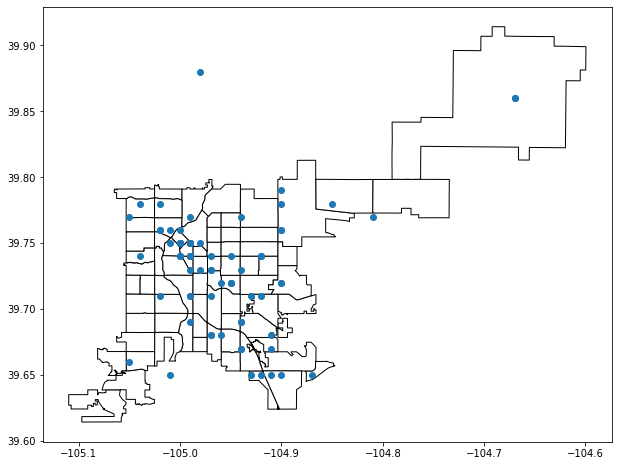

In [6]:
neighborhoods = gpd.read_file('neighborhoods.shp',crs = 4326)

ax = neighborhoods.plot(color='white', edgecolor='black', figsize=(15,8))

gpd.GeoDataFrame(df_denver, geometry = gpd.points_from_xy(df_denver.Longitude, df_denver.Latitude) ,crs = 4326).plot(ax=ax)
plt.show()

In [7]:
census = pd.read_csv('census.csv')
# census.set_index('NBHD_ID', inplace=True)

census.info()

census.fillna(0, inplace = True)
census.set_index('NBHD_NAME',inplace = True)
census

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NBHD_ID          78 non-null     int64  
 1   NBHD_NAME        78 non-null     object 
 2   POPULATION_2010  78 non-null     float64
 3   AGE_LESS_18      78 non-null     float64
 4   AGE_18_TO_34     78 non-null     float64
 5   AGE_35_TO_65     78 non-null     float64
 6   AGE_65_PLUS      78 non-null     float64
 7   NUM_HOUSEHOLDS   78 non-null     float64
 8   FAMILIES         78 non-null     float64
 9   NUM_HHLD_100K+   48 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.2+ KB


,NBHD_ID,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
NBHD_NAME,,,,,,,,,
Athmar Park,1,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
Auraria,2,705.0,7.0,635.0,57.0,6.0,60.0,15.0,0.0
Baker,3,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,0.0
Barnum,4,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
Barnum West,5,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,0.0
...,...,...,...,...,...,...,...,...,...
West Colfax,74,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
West Highland,75,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
Westwood,76,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0


In [8]:
neighborhoods.set_index('NBHD_NAME', inplace = True)
neighborhoods.head()

,NBHD_ID,geometry
NBHD_NAME,,
Auraria,2,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
Cory - Merrill,21,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
Belcaro,7,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
Washington Park,70,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
Washington Park West,71,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


In [9]:
def simulate_population(col = 'AGE_18_TO_34', min_rand_pts = 10):
    min_col = census[census[col] > 0][col].min()
    n_rand_pts_coeff = (min_rand_pts * (census[col] / (min_col))).astype(int)
    people = gpd.GeoSeries()

    for nbhdinx in neighborhoods.index:
        xmin, ymin, xmax, ymax = gpd.GeoSeries(neighborhoods.loc[nbhdinx].geometry).total_bounds
        n_rand_pts = n_rand_pts_coeff.loc[nbhdinx]
        n_rand_pts_in = 0

        while n_rand_pts_in < n_rand_pts:
            rand_pts = \
            gpd.GeoSeries.from_xy(
                np.random.uniform(xmin, xmax, size=n_rand_pts-n_rand_pts_in),
                np.random.uniform(ymin, ymax, size=n_rand_pts-n_rand_pts_in)
            )
            n_rand_pts_in += rand_pts.within(neighborhoods.loc[nbhdinx].geometry).sum()
            people = people.append(
                rand_pts[rand_pts.within(neighborhoods.loc[nbhdinx].geometry)]
            )
    return people

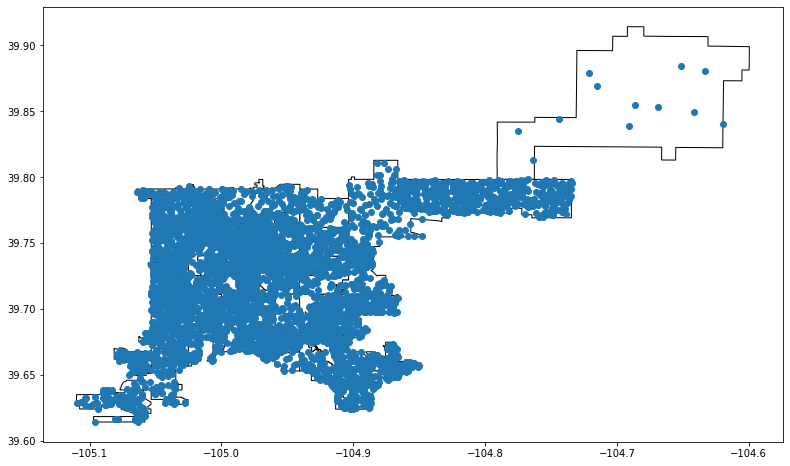

In [10]:
peop18 = simulate_population()

ax = neighborhoods.plot(color='white', edgecolor='black', figsize=(15,8))
peop18.plot(ax=ax)

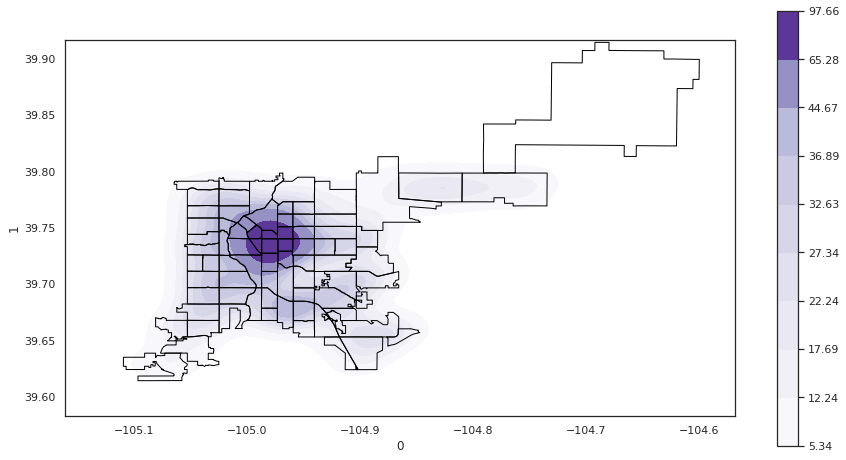

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
ax = sns.kdeplot(x=0, y=1, data = pd.DataFrame([peop18.x.values, peop18.y.values]).T, shade = True, cmap='Purples',cbar=True)
neighborhoods.plot(edgecolor='black',color = 'None', ax = ax)
plt.show()

In [12]:
(10 * (census.AGE_18_TO_34 / census.AGE_18_TO_34.min())).astype(int).min()

10

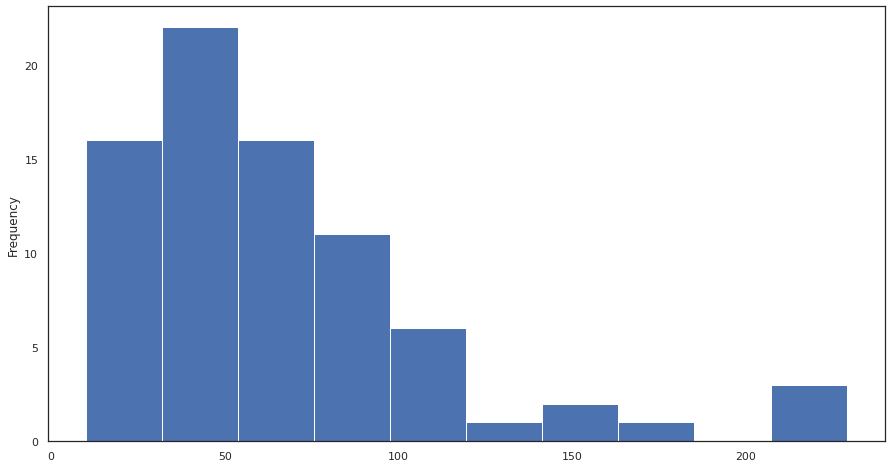

In [13]:
(10 * (census.AGE_18_TO_34 / census.AGE_18_TO_34.min())).astype(int).plot(kind='hist');

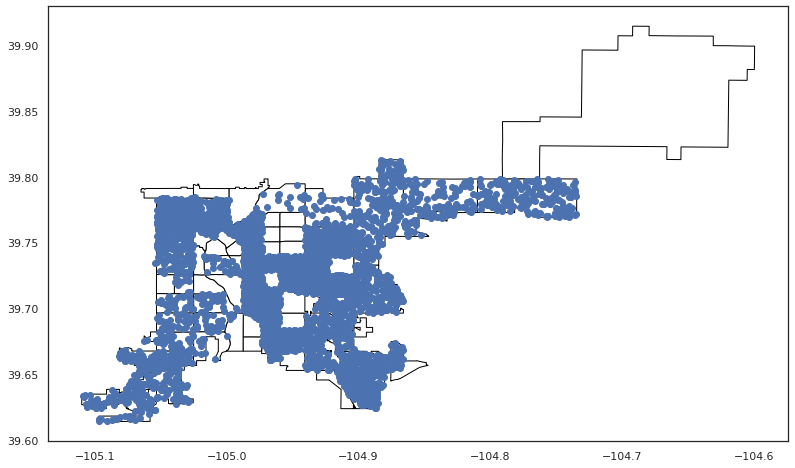

In [14]:
peop100k = simulate_population(col ='NUM_HHLD_100K+')

ax = neighborhoods.plot(color='white', edgecolor='black', figsize=(15,8))
peop100k.plot(ax=ax)

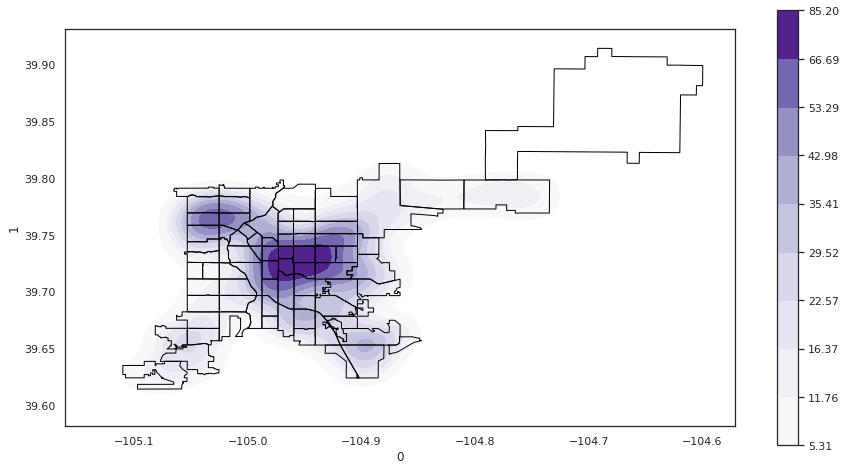

In [15]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
ax = sns.kdeplot(x=0, y=1, data = pd.DataFrame([peop100k.x.values, peop100k.y.values]).T, shade = True, cmap='Purples',cbar=True)
neighborhoods.plot(edgecolor='black',color = 'None', ax = ax)
plt.show()

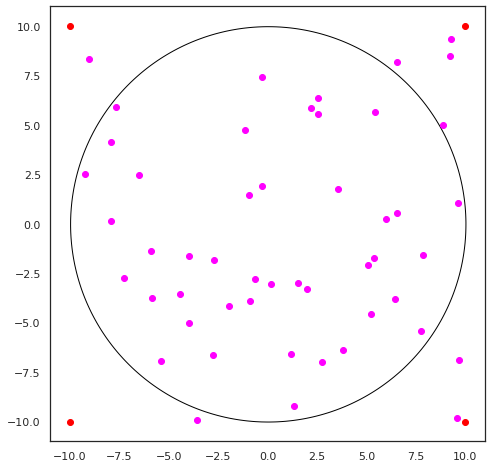

In [16]:
from shapely.geometry import Polygon, Point

t = np.arange(0, 2*np.pi,0.01)
x = np.round(10*np.cos(t),3) 
y = np.round(10*np.sin(t),3)

dfcirc = gpd.GeoSeries.from_xy(x, y ,crs = 4326)

p1 = Polygon(dfcirc.geometry)
df = gpd.GeoDataFrame()
df.index = ['circulo']
df['geometry'] = p1

ax = df.plot(color='white', edgecolor='black', figsize=(15,8))

xmin, ymin, xmax, ymax = df.total_bounds


gpd.GeoDataFrame(geometry = (gpd.points_from_xy([xmin, xmax,xmin, xmax], [ymin, ymax, ymax, ymin])) ,crs = 4326).plot(ax=ax, color = 'red')

xrnd = np.random.uniform(xmin,xmax,50)
yrnd = np.random.uniform(ymin,ymax,50)

df_rndpts = gpd.GeoSeries.from_xy(xrnd, yrnd ,crs = 4326)

df_rndpts.plot(ax=ax, color = 'magenta')
plt.show()

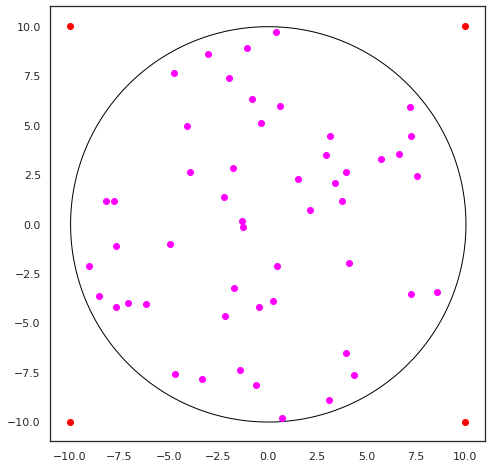

In [17]:
ax = df.plot(color='white', edgecolor='black', figsize=(15,8))

xmin, ymin, xmax, ymax = df.total_bounds


gpd.GeoDataFrame(geometry = (gpd.points_from_xy([xmin, xmax,xmin, xmax], [ymin, ymax, ymax, ymin])) ,crs = 4326).plot(ax=ax, color = 'red')

xrnd = np.random.uniform(xmin,xmax,50)
yrnd = np.random.uniform(ymin,ymax,50)

rndpts = []
k = 0
while k <= 50:
    ptest = Point(np.random.uniform(xmin,xmax),np.random.uniform(xmin,xmax))
    if (df.geometry).contains(ptest).all():
        rndpts.append(ptest)
        k += 1
go_rndpts = gpd.GeoSeries(rndpts)
go_rndpts.plot(ax=ax, color = 'magenta')

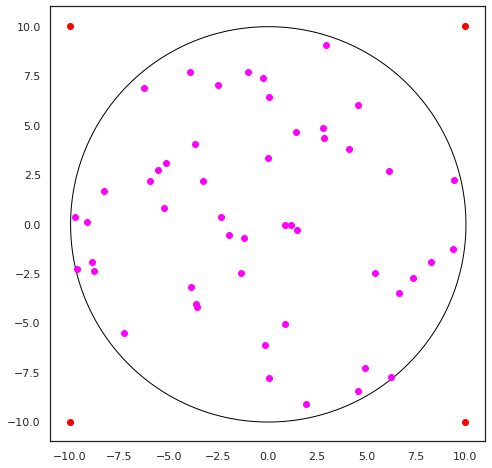

In [18]:
ax = df.plot(color='white', edgecolor='black', figsize=(15,8))

xmin, ymin, xmax, ymax = df.total_bounds


gpd.GeoDataFrame(geometry = (gpd.points_from_xy([xmin, xmax,xmin, xmax], [ymin, ymax, ymax, ymin])) ,crs = 4326).plot(ax=ax, color = 'red')

xrnd = np.random.uniform(xmin,xmax,50)
yrnd = np.random.uniform(ymin,ymax,50)

rndpts = []
k = 0

npts = 50
npts_in = 0
go_rndpts = gpd.GeoSeries()

while npts_in < npts:
    ptest = \
            gpd.GeoSeries.from_xy(
                np.random.uniform(xmin, xmax, size = npts-npts_in),
                np.random.uniform(ymin, ymax, size = npts-npts_in)
            )

    pts_in = ptest.within(df.geometry[0])
    npts_in += pts_in.sum()
    go_rndpts = go_rndpts.append(ptest[pts_in]) # Append retorna valor

go_rndpts.plot(ax=ax, color = 'magenta');